## Analysis
>I just want to try to analyse orders of Olist as the order id is a common factor and also the values has same unique values which can help us to perform a good analysis

>Let's Import Libraries for EDA and for performing visualisation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression ## for performing the logistic Regression
from sklearn.metrics import accuracy_score ## to obtain the accuracy score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
payment= pd.read_csv("olist_order_payments_dataset.csv")

In [3]:

reviews= pd.read_csv("olist_order_reviews_dataset.csv")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

In [4]:
orders= pd.read_csv("olist_orders_dataset.csv")

In [5]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
print(orders.shape)
print(reviews.shape)
print(payment.shape)

(99441, 8)
(100000, 7)
(103886, 5)


In [9]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,5a1162244090096d45dbdd8c9037a720,9e6f75fc261ed4b61aaa7074d5dafab1,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [10]:
reviews.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


#### so there are missing values in the order dataset and this dataset has datetime values

In [13]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Here Review comment has missing values, i feel we have to consider the review and the message so we can understand the sentiment of the person in that. I feel we can try to get the sentiment of the review

In [15]:
re_com= reviews

In [16]:
re_com=re_com.drop(columns=['review_id','order_id','review_answer_timestamp','review_comment_title'])

In [17]:
re_com.head()

,review_score,review_comment_message,review_creation_date
0,4,NaN,2018-01-18 00:00:00
1,5,NaN,2018-03-10 00:00:00
2,5,NaN,2018-02-17 00:00:00
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00


Text(0.5, 1.0, ' Distribution of score')

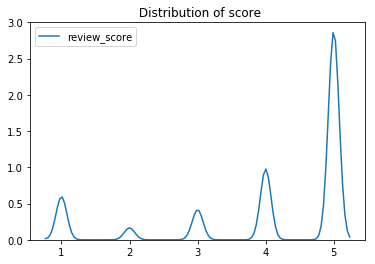

In [18]:
sns.kdeplot(re_com['review_score']).set_title(" Distribution of score")

In [19]:
def getLength(message):
    message_token=message.split(" ") #taking the length of the words 
    return len(message_token)

re_com['length_of_com']=re_com['review_comment_message'].apply(lambda message: getLength(message))

pd.concat(["payment","reviews","orders"], axis=1)

pd.merge(payment,reviews,orders)

In [20]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Ok as I couldn't combine teh datasets I wanted to collect the information based on the columns i get and formulate a few questions

### SO let me start with Payments:
    what is the most frequestly used payment gateway?
    
    Average range of installments and the value paid at each installment

In [21]:
value_counts=payment['payment_type'].value_counts()

In [22]:
ptype = value_counts.rename_axis('paytype').reset_index(name='count')

In [23]:
ptype

,paytype,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [24]:
ptype['count']*(100/103886)

0    73.922376
1    19.043952
2    5.558978 
3    1.471806 
4    0.002888 
Name: count, dtype: float64

So it is found that the most fequently used payment method is

>#### Credit_card as the 73.92% of the payment method and boleto has 19.04%

of the payment method so Olist has to concentrate and give more offers to those users to drive more sales

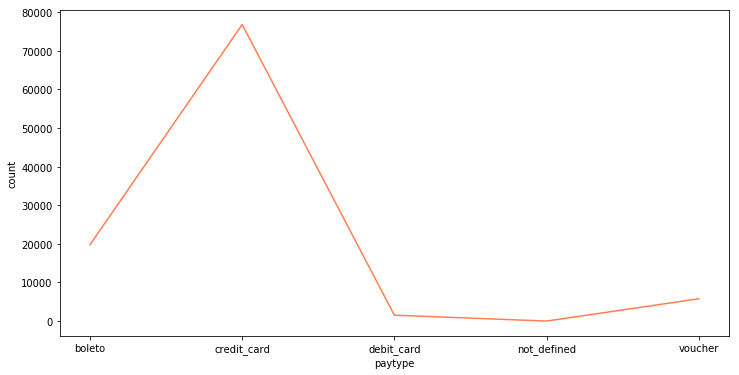

In [25]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='paytype',y='count', color="coral", data=ptype,estimator=None)

In [26]:
value=payment['payment_installments'].value_counts()
pItype = value.rename_axis('times').reset_index(name='count')

In [27]:
pItype

,times,count
0,1,52546
1,2,12413
2,3,10461
3,4,7098
4,10,5328
5,5,5239
6,8,4268
7,6,3920
8,7,1626
9,9,644


In [28]:
pItype['count']*(100/103886)

0     50.580444
1     11.948675
2     10.069692
3     6.832489 
4     5.128699 
5     5.043028 
6     4.108350 
7     3.773367 
8     1.565177 
9     0.619910 
10    0.128025 
11    0.071232 
12    0.025990 
13    0.022140 
14    0.017327 
15    0.016364 
16    0.015401 
17    0.014439 
18    0.007701 
19    0.004813 
20    0.002888 
21    0.001925 
22    0.000963 
23    0.000963 
Name: count, dtype: float64

So it is found that the most fequently opted installment is ranging form 1-3 is high

#### As 1 month is opted by 50.58%, 2 months is opted by 11.94% and 3 months is opted by 10.06%
of the payment method so Olist has to concentrate and give more offers to those users to drive more sales

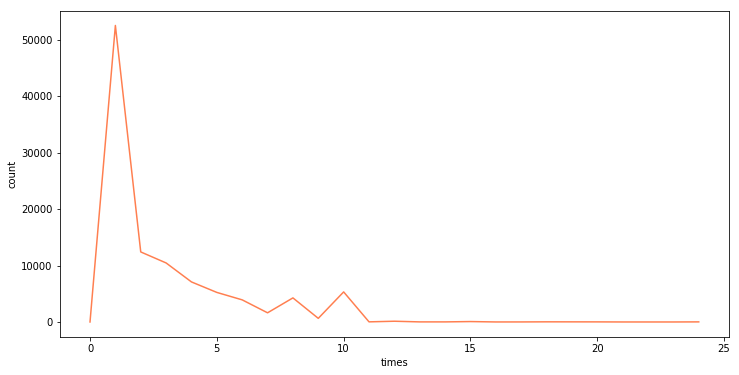

In [29]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='times',y='count', color="coral", data=pItype,estimator=None)

### Now let me understand what does the customers think about the Olist:
    This can be seen through the rating and message or comment made by the person 
    
    so let see First the frequency of length of message for rating and later the sentiment of that message 

In [30]:
re_com.head()

,review_score,review_comment_message,review_creation_date
0,4,NaN,2018-01-18 00:00:00
1,5,NaN,2018-03-10 00:00:00
2,5,NaN,2018-02-17 00:00:00
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00


### First, review_score's Frequency

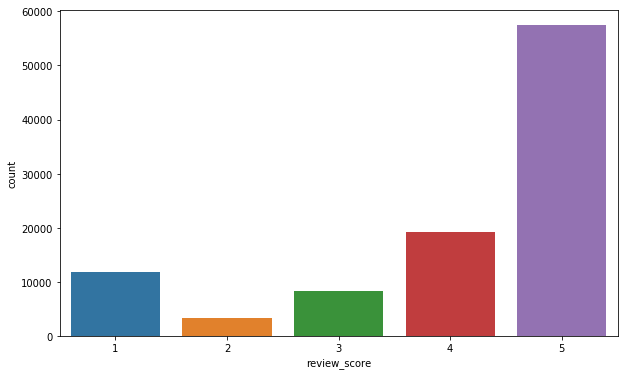

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(re_com['review_score'])

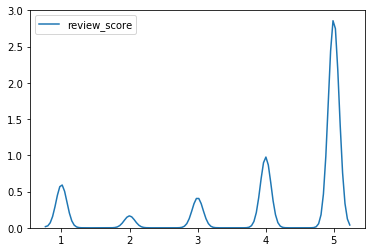

In [32]:
sns.kdeplot(re_com['review_score'])

In [33]:
counts=re_com['review_score'].value_counts()
print(counts)

5    57420
4    19200
1    11858
3    8287 
2    3235 
Name: review_score, dtype: int64


In [34]:
rating = counts.rename_axis('rating').reset_index(name='count')

In [35]:
rating['count']*(100/100000)

0    57.420
1    19.200
2    11.858
3    8.287 
4    3.235 
Name: count, dtype: float64

#### People has given 5 rating more than 50% of the people and 76.62% of the people has more postive opinion about Olist

## Perfoming NLTK program

In [36]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def clean_text(text):
    Stopwords=stopwords.words('Portuguese')
    test_line=text
    test_line_cleaned="".join([x for x in test_line if x not in string.punctuation])
    test_line_cleaned=test_line_cleaned.lower()
    test_tokens=test_line_cleaned.split(" ")
    test_tokens=[token for token in test_tokens if token not in Stopwords]
    ps = Stemmer() 
    test_line_cleaned=" ".join([ps.stem(token) for token in test_tokens])
    return test_line_cleaned

In [37]:
re_com= re_com.dropna()

In [38]:
re_com.head()

,review_score,review_comment_message,review_creation_date
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00
15,5,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23 00:00:00


In [39]:
review=re_com

In [40]:
review.columns=["rating", "review","date"]

In [41]:
review.shape

(41753, 3)

>####  So in 1 Lakh consumers only 41 thousand people or consumers has given the reviews

In [42]:
review.head()

,rating,review,date
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00
15,5,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23 00:00:00


In [43]:
def getLength(message):
    message_token=message.split(" ") #taking the length of the words 
    return len(message_token)

In [44]:
review['length_of_message']=review['review'].apply(lambda message: getLength(message))

In [45]:
review.head()

,rating,review,date,length_of_message
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,6
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,15
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00,30
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,7
15,5,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23 00:00:00,9


Text(0.5, 1.0, ' Distribution of Length of Message')

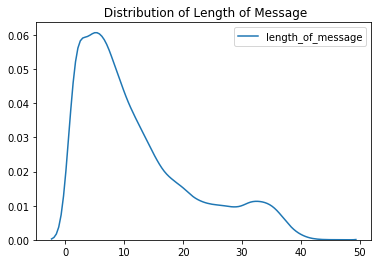

In [46]:
sns.kdeplot(review['length_of_message']).set_title(" Distribution of Length of Message")


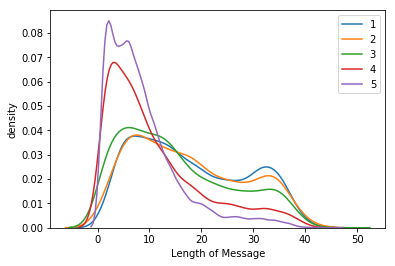

In [47]:
sns.kdeplot(review.loc[review['rating']==1,"length_of_message"],label=1);
sns.kdeplot(review.loc[review['rating']==2,"length_of_message"],label=2);
sns.kdeplot(review.loc[review['rating']==3,"length_of_message"],label=3);
sns.kdeplot(review.loc[review['rating']==4,"length_of_message"],label=4);
sns.kdeplot(review.loc[review['rating']==5,"length_of_message"],label=5);

# beautifying the labels
plt.xlabel('Length of Message')
plt.ylabel('density')
plt.show()

>So the people who has given less rating has written more,  intresting fact is all 5 rated people had given lengthy review mostly 

## Lets see the sentiment of the message

In [48]:
#using vader sentiment to get positives and negative of the statement

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 

In [49]:
def sentiment_score(sentence):
    sid_obj = SentimentIntensityAnalyzer() # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary.  
    sentiment_dict = sid_obj.polarity_scores(sentence)  # which contains pos, neg, neu, and compound scores.
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return("Negative") 
  
    else : 
        return("Neutral") 
        

In [50]:
review['sentiment']= review['review'].apply(lambda x:sentiment_score(x))
review.head()

,rating,review,date,length_of_message,sentiment
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,6,Neutral
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,15,Neutral
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00,30,Negative
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,7,Neutral
15,5,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23 00:00:00,9,Positive


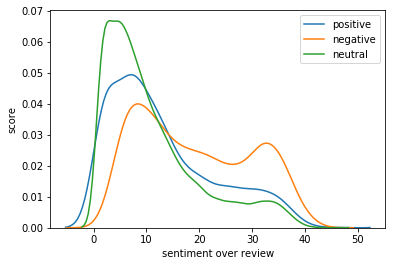

In [51]:
sns.kdeplot(review.loc[review['sentiment']== 'Positive',"length_of_message"],label='positive');
sns.kdeplot(review.loc[review['sentiment']== 'Negative' ,"length_of_message"],label='negative');
sns.kdeplot(review.loc[review['sentiment']== 'Neutral',"length_of_message"],label='neutral');

# beautifying the labels
plt.xlabel('sentiment over review')
plt.ylabel('score')
plt.show()

#### So we can see that postive reviewers has commented very less but negative reviewers has commented badly and written so much

In [52]:
review.shape

(41753, 5)

In [53]:
review['sentiment'].value_counts()

Neutral     33774
Negative    4825 
Positive    3154 
Name: sentiment, dtype: int64

## Shopping timing of Olist customers

let me try to understand when does the customer actually shop in Brazil

In [54]:
review['date']= pd.to_datetime(review['date'], errors='coerce')

In [55]:
review['hour']=review['date'].dt.hour

In [56]:
review.head()

,rating,review,date,length_of_message,sentiment,hour
3,5,Recebi bem antes do prazo estipulado.,2017-04-21,6,Neutral,0
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01,15,Neutral,0
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22,30,Negative,0
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,7,Neutral,0
15,5,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23,9,Positive,0


In [57]:
value_hours=review['hour'].value_counts()

In [58]:
df1 = value_hours.rename_axis('unique_hours').reset_index(name='counts')
print (df1)

   unique_hours  counts
0  0             41709 
1  1             44    


> It means that mostly people will be writing the reviews mostly on "Midnight"

## Creating a wordCloud

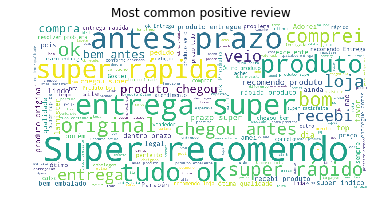

In [59]:
import os
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

pd.set_option('max_colwidth', 100)
import numpy as np
from PIL import Image
%matplotlib inline



maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('Portuguese')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(review.loc[review['sentiment']== 'Positive',"review"].tolist()))

plt.title("Most common positive review")
plt.imshow(wordcloud)
wordcloud.to_file("wordbird.png")
plt.axis('off')
plt.show()

##### Here customers want to recommend the product or you can see it may be the site too..

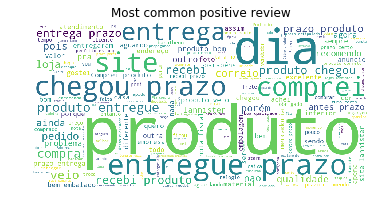

In [60]:
maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('Portuguese')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(review.loc[review['sentiment']== 'Negative',"review"].tolist()))

plt.title("Most common positive review")
plt.imshow(wordcloud)
wordcloud.to_file("wordbird1.png")
plt.axis('off')
plt.show()

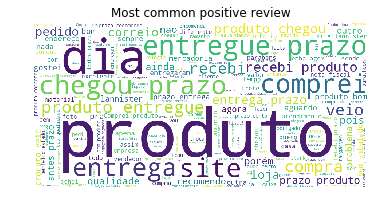

In [61]:
maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('Portuguese')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(review.loc[review['sentiment']== 'Negative',"review"].tolist()))

plt.title("Most common positive review")
plt.imshow(wordcloud)
wordcloud.to_file("wordbird2.png")
plt.axis('off')
plt.show()

>Both in the negative and neutral words customers talked about product and day that delivered so i recommend to Olist look what is going on wrong with the product and delivery days 

#### So now i know what are the thoughts of people who are purchasing or shopping in the Olist mostly there is a positive review about the "Olist" and nearly 75% of population is satisfied by Olist service

In [62]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Order details:
    By knowing when the order is made and when it is deliveried 
    
    Is it getting delivered late or on time 
    
    If we see the orders at what time is made, Olist can have a back-up and have more stock for that particualr time period and helps the customers to make more purchases 

In [63]:
order=orders.drop(columns=['order_id','customer_id','order_approved_at','order_delivered_carrier_date'])

In [64]:
order.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00


In [65]:
order.columns=['order_status','purchase_time','delivery_time','estimated_delivery_time']

In [66]:
order['purchase_time']= pd.to_datetime(order['purchase_time'], errors='coerce')
order['delivery_time']= pd.to_datetime(order['delivery_time'], errors='coerce')
order['estimated_delivery_time']= pd.to_datetime(order['estimated_delivery_time'], errors='coerce')

In [67]:
order['purchase_hour']=order['purchase_time'].dt.hour
order['delivery_hour']=order['delivery_time'].dt.hour
order['estimated_delivery_hour']=order['estimated_delivery_time'].dt.hour

In [68]:
order.head()

,order_status,purchase_time,delivery_time,estimated_delivery_time,purchase_hour,delivery_hour,estimated_delivery_hour
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,10,21.0,0
1,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,20,15.0,0
2,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,8,18.0,0
3,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,19,0.0,0
4,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,21,18.0,0


In [69]:
order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

> So it seems most of the products are delivered and only 6 means0.000006% are cancelled which means the requirement is being met for the customers which they opted for 

It would be nice if we know the how many has returned

In [70]:
order['purchase_date']=order['purchase_time'].dt.date
order['delivery_date']=order['delivery_time'].dt.date
order['estimated_delivery_date']=order['estimated_delivery_time'].dt.date

In [71]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
order_status               99441 non-null object
purchase_time              99441 non-null datetime64[ns]
delivery_time              96476 non-null datetime64[ns]
estimated_delivery_time    99441 non-null datetime64[ns]
purchase_hour              99441 non-null int64
delivery_hour              96476 non-null float64
estimated_delivery_hour    99441 non-null int64
purchase_date              99441 non-null object
delivery_date              96476 non-null object
estimated_delivery_date    99441 non-null object
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 7.6+ MB


There are Nan values let me drop it if i dont know delivery time and date how we know  the average

In [72]:
order=order.dropna()

In [73]:
order['deilvery_days']=order['delivery_date']-order['purchase_date']

In [74]:
deli=order['deilvery_days'].value_counts()

In [75]:
deli

7 days      7482
8 days      7123
6 days      6507
9 days      6256
10 days     5793
11 days     5261
5 days      5258
12 days     4937
13 days     4509
4 days      4497
14 days     4101
3 days      3448
15 days     3330
2 days      2874
16 days     2816
17 days     2494
18 days     2280
19 days     1934
20 days     1801
21 days     1515
22 days     1362
23 days     1115
24 days      993
25 days      878
26 days      719
27 days      675
1 days       629
28 days      624
29 days      532
30 days      436
31 days      401
32 days      365
34 days      315
33 days      307
35 days      288
36 days      259
37 days      201
41 days      175
39 days      171
38 days      169
42 days      136
40 days      132
43 days      129
44 days      119
46 days      115
45 days      100
47 days       81
48 days       73
50 days       69
49 days       59
51 days       50
52 days       47
54 days       40
56 days       39
53 days       36
55 days       29
57 days       25
58 days       25
59 days       

>Let Me see that what is the delivery days on an average they make as interestingly even they make morethan 208 days

In [76]:
delivery= deli.rename_axis('days').reset_index(name='counts')
print (delivery)

        days  counts
0     7 days    7482
1     8 days    7123
2     6 days    6507
3     9 days    6256
4    10 days    5793
5    11 days    5261
6     5 days    5258
7    12 days    4937
8    13 days    4509
9     4 days    4497
10   14 days    4101
11    3 days    3448
12   15 days    3330
13    2 days    2874
14   16 days    2816
15   17 days    2494
16   18 days    2280
17   19 days    1934
18   20 days    1801
19   21 days    1515
20   22 days    1362
21   23 days    1115
22   24 days     993
23   25 days     878
24   26 days     719
25   27 days     675
26    1 days     629
27   28 days     624
28   29 days     532
29   30 days     436
30   31 days     401
31   32 days     365
32   34 days     315
33   33 days     307
34   35 days     288
35   36 days     259
36   37 days     201
37   41 days     175
38   39 days     171
39   38 days     169
40   42 days     136
41   40 days     132
42   43 days     129
43   44 days     119
44   46 days     115
45   45 days     100
46   47 days 

In [77]:
delivery['days']=delivery['days'].dt.days
print(delivery)

     days  counts
0       7    7482
1       8    7123
2       6    6507
3       9    6256
4      10    5793
5      11    5261
6       5    5258
7      12    4937
8      13    4509
9       4    4497
10     14    4101
11      3    3448
12     15    3330
13      2    2874
14     16    2816
15     17    2494
16     18    2280
17     19    1934
18     20    1801
19     21    1515
20     22    1362
21     23    1115
22     24     993
23     25     878
24     26     719
25     27     675
26      1     629
27     28     624
28     29     532
29     30     436
30     31     401
31     32     365
32     34     315
33     33     307
34     35     288
35     36     259
36     37     201
37     41     175
38     39     171
39     38     169
40     42     136
41     40     132
42     43     129
43     44     119
44     46     115
45     45     100
46     47      81
47     48      73
48     50      69
49     49      59
50     51      50
51     52      47
52     54      40
53     56      39
54     53 

Text(0.5, 1.0, ' Distribution of days')

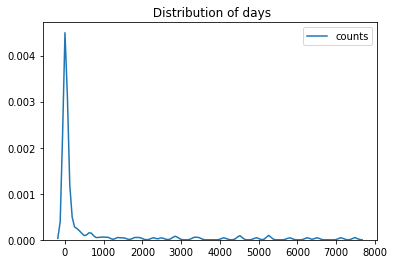

In [78]:
sns.kdeplot(delivery['counts']).set_title(" Distribution of days")


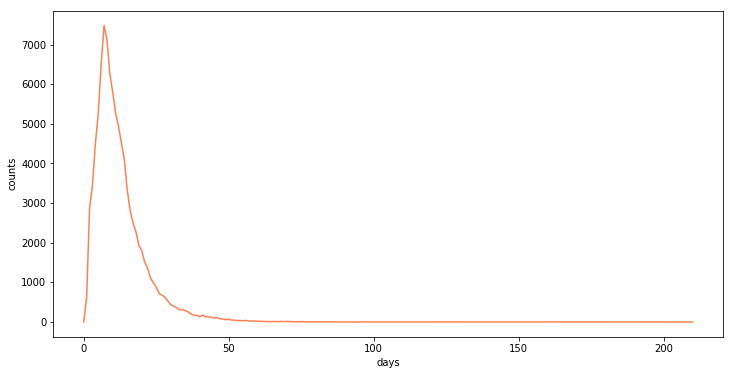

In [79]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='days',y='counts', color="coral", data=delivery,estimator=None)

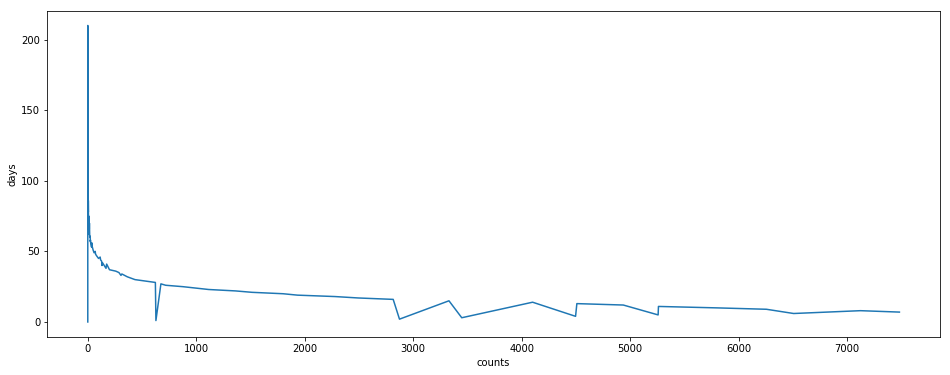

In [80]:
plt.figure(figsize=(16,6))
ax=sns.lineplot(x='counts',y='days', data=delivery,estimator=None)

>so there are few orders made and deliveried very late so this area has to "be reduced as it is taking moretime" this leads to loss in customers in future if other e-commerce sites give very less delivery time then there will be high churn rate 

In [81]:
hour=order['purchase_hour'].value_counts()

In [82]:
purchase= hour.rename_axis('hours').reset_index(name='counts')
print (purchase)

    hours  counts
0      16    6475
1      11    6385
2      14    6384
3      13    6309
4      15    6250
5      21    6040
6      20    6008
7      10    5978
8      17    5961
9      19    5802
10     12    5802
11     22    5658
12     18    5585
13      9    4647
14     23    4014
15      8    2907
16      0    2322
17      7    1199
18      1    1133
19      2     496
20      6     477
21      3     259
22      4     203
23      5     182


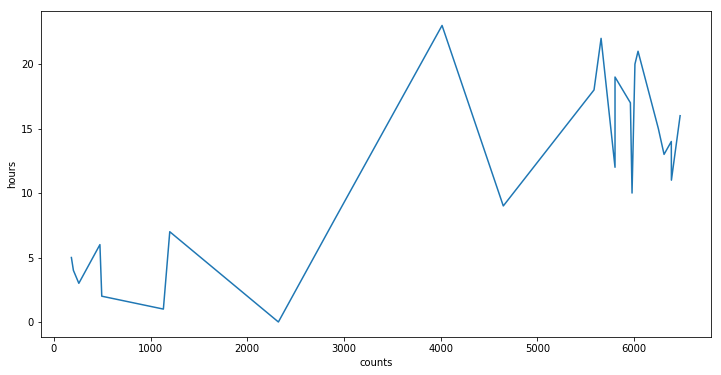

In [83]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='counts',y='hours', data=purchase,estimator=None)

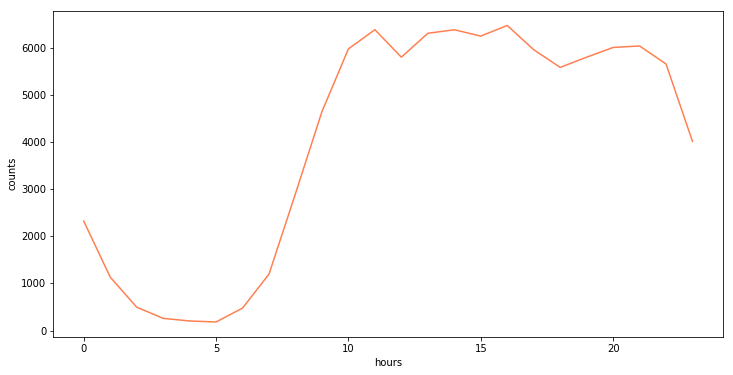

In [84]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='hours',y='counts',color="coral", data=purchase,estimator=None)

Here it states by this graph we can analyse that form morning 8 onwards purchase will start and it will be peak at all the times and it only comes down after 10 P.M

#### Let me see how much the deviation is there between estimated delivery and actual delivery

Is the estimated time which the Olist has told or promissed that will be is delivered on time or delayed or they did pre-delivery means delivered before than expected time 

In [85]:
order['fast_delay_delivery']=order['estimated_delivery_date']-order['delivery_date']

In [86]:
order['fast_delay_delivery'].value_counts()

14 days      7126
13 days      5963
15 days      5345
7 days       4837
8 days       4828
10 days      4646
9 days       4626
11 days      4619
12 days      4556
16 days      3903
6 days       3625
17 days      3412
18 days      3128
20 days      2960
21 days      2810
19 days      2712
5 days       2219
4 days       1917
22 days      1845
3 days       1731
2 days       1550
1 days       1462
0 days       1292
23 days      1263
24 days      1067
25 days       913
-1 days       825
27 days       816
26 days       793
28 days       753
-2 days       545
-3 days       500
29 days       492
-7 days       483
-4 days       453
-5 days       447
-6 days       419
30 days       377
-8 days       336
31 days       304
32 days       277
33 days       261
35 days       256
34 days       247
-9 days       227
-10 days      207
-13 days      196
-11 days      181
-14 days      171
36 days       168
-12 days      161
-15 days      159
-16 days       98
38 days        96
37 days        92
-17 days  

so in the observation it has been seen that once there is a highest delay i.e., 175 is been delayed, 166,165,153,152 days its been delayed once but there are more than 10 times that it's been delay in delivery which exceed 100 days

Good to see there is a pre-delivery made than expected time

In [87]:
delay=order['fast_delay_delivery'].value_counts()
delay=delay.rename_axis('days').reset_index(name='counts')

In [88]:
delay['days']=delay['days'].dt.days

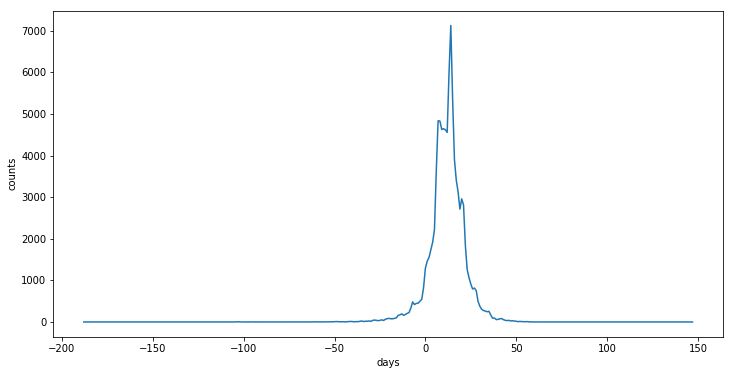

In [89]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='days',y='counts', data=delay,estimator=None)

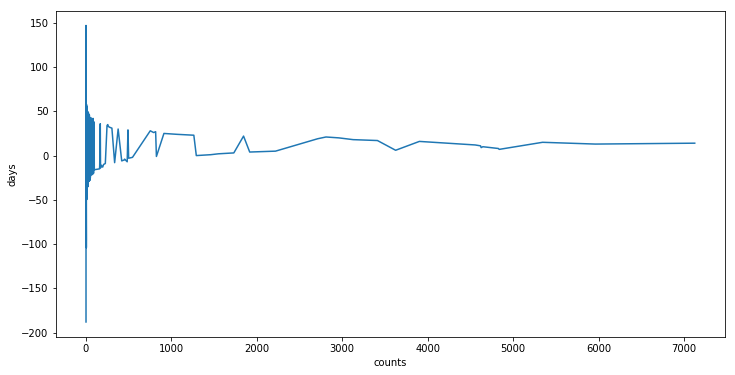

In [90]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='counts',y='days', data=delay,estimator=None)

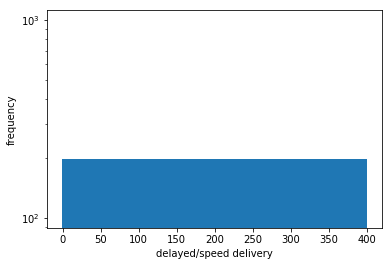

In [91]:
counts = delay.groupby(['days']).size()\
                              .reset_index(name='counts')\
                              .counts

# defining bins for histogram                              
my_bins = np.arange(0,counts.max()+400, 400)-0.5

# ploting histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+400, 400)
plt.xlabel('delayed/speed delivery')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

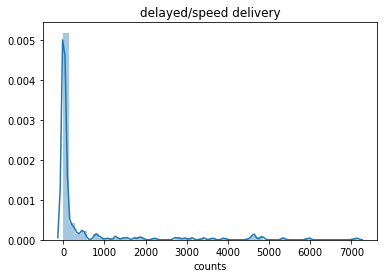

In [92]:
sns.distplot(delay['counts']).set_title("delayed/speed delivery")      ### univariate plot and numerical values plot
plt.show()

C:\Users\Nivya Sree\Anaconda3\anaconda3\lib\site-packages\pandas\core\indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
C:\Users\Nivya Sree\Anaconda3\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nivya Sree\Anaconda3\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


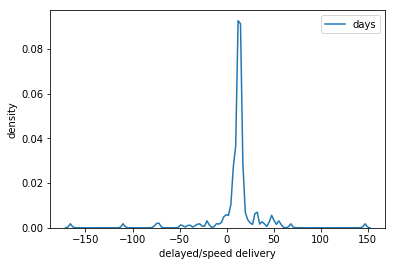

In [93]:
sns.kdeplot(delay.loc[delay['counts'],"days"],label='days');

# beautifying the labels
plt.xlabel('delayed/speed delivery')
plt.ylabel('density')
plt.show()

##### By this we can understand that there is 150 days delay or pre delivery is done than estimated delivery time

In [94]:
#import pandas as pd
#import numpy as np

# Options for pandas
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations

import plotly.express as px
#import matplotlib.pyplot as plt
#import seaborn as sns
import re

import gensim
from gensim import corpora

# libraries for visualization

import pyLDAvis
import pyLDAvis.gensim

In [95]:
review['clean_message']=review['review'].apply(lambda message: clean_text(message))

In [96]:
review.head()

,rating,review,date,length_of_message,sentiment,hour,clean_message
3,5,Recebi bem antes do prazo estipulado.,2017-04-21,6,Neutral,0,recebi bem ant prazo estipulado
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01,15,Neutral,0,parabén loja lannist adorei comprar internet seguro prático parabén todo feliz páscoa
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta...,2018-05-22,30,Negative,0,aparelho eficient site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca cor...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,7,Neutral,0,pouco travandopelo valor ta boa\r\n
15,5,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23,9,Positive,0,vendedor confiável produto ok entrega ant prazo


In [97]:
review1=review

In [98]:
review1=review1[~pd.isnull(review1['review'])]
review1.shape

(41753, 7)

In [99]:
corpus=review1['review'].tolist()

In [100]:
tokenised_corpus=[]
for corp in corpus:
    
    tokenised_corpus.append([token for token in corp.split(" ")])
tokenised_corpus

[['Recebi', 'bem', 'antes', 'do', 'prazo', 'estipulado.'],
 ['Parabéns',
  'lojas',
  'lannister',
  'adorei',
  'comprar',
  'pela',
  'Internet',
  'seguro',
  'e',
  'prático',
  'Parabéns',
  'a',
  'todos',
  'feliz',
  'Páscoa'],
 ['aparelho',
  'eficiente.',
  'no',
  'site',
  'a',
  'marca',
  'do',
  'aparelho',
  'esta',
  'impresso',
  'como',
  '3desinfector',
  'e',
  'ao',
  'chegar',
  'esta',
  'com',
  'outro',
  'nome...atualizar',
  'com',
  'a',
  'marca',
  'correta',
  'uma',
  'vez',
  'que',
  'é',
  'o',
  'mesmo',
  'aparelho'],
 ['Mas', 'um', 'pouco', ',travando...pelo', 'valor', 'ta', 'Boa.\r\n'],
 ['Vendedor',
  'confiável,',
  'produto',
  'ok',
  'e',
  'entrega',
  'antes',
  'do',
  'prazo.'],
 ['GOSTARIA',
  'DE',
  'SABER',
  'O',
  'QUE',
  'HOUVE,',
  'SEMPRE',
  'RECEBI',
  'E',
  'ESSA',
  'COMPRA',
  'AGORA',
  'ME',
  'DECPCIONOU'],
 ['Péssimo'],
 ['Loja', 'nota', '10'],
 ['obrigado', 'pela', 'atençao', 'amim', 'dispensada'],
 ['A',
  'compra',

In [101]:
dictionary = corpora.Dictionary(tokenised_corpus)

In [102]:
len(dictionary)

39494

In [103]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenised_corpus]

In [104]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=100, passes=50)

In [105]:
lda_model.print_topics()


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

[(0,
  '0.031*"tudo" + 0.023*"estou" + 0.019*"." + 0.019*"O" + 0.017*"Recomendo" + 0.016*"Bom" + 0.016*"E" + 0.016*"excelente" + 0.014*"" + 0.011*"A"'),
 (1,
  '0.047*"o" + 0.034*"não" + 0.033*"e" + 0.028*"a" + 0.027*"que" + 0.026*"de" + 0.022*"produto" + 0.014*"recebi" + 0.013*"para" + 0.013*"um"'),
 (2,
  '0.072*"do" + 0.050*"antes" + 0.044*"prazo" + 0.038*"e" + 0.038*"produto" + 0.031*"muito" + 0.028*"" + 0.027*"chegou" + 0.027*"bem" + 0.024*"entrega"'),
 (3,
  '0.045*"de" + 0.033*"a" + 0.031*"é" + 0.027*"e" + 0.025*"o" + 0.025*"com" + 0.024*"muito" + 0.022*"" + 0.020*"produto" + 0.018*"veio"')]

C:\Users\Nivya Sree\Anaconda3\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.181715 -0.128258       1        1  51.104439
3      0.093884 -0.130489       2        1  20.481516
2      0.080648  0.292371       3        1  19.648447
0     -0.356247 -0.033624       4        1   8.765596, topic_info=     Category          Freq        Term         Total  loglift  logprob
3     Default  10443.000000          do  10443.000000  30.0000  30.0000
1     Default   4938.000000       antes   4938.000000  29.0000  29.0000
5     Default   4375.000000       prazo   4375.000000  28.0000  28.0000
119   Default  11363.000000          de  11363.000000  27.0000  27.0000
110   Default   8833.000000         não   8833.000000  26.0000  26.0000
9     Default  10698.000000           a  10698.000000  25.0000  25.0000
85    Default   5454.000000       muito   5454.000000  24.0000  24.0000
40    Default   4207.000000           é   4207.000000  23.0000  23.0000
2     Default   2647.000000         bem   2647.000000  22.0000  22.0000
118   Default   3800.000000      chegou   3800.000000  21.0000  21.0000
50    Default   3774.000000     entrega   3774.000000  20.0000  20.0000
24    Default   5878.000000         com   5878.000000  19.0000  19.0000
461   Default   2196.000000         bom   2196.000000  18.0000  18.0000
53    Default  11338.000000     produto  11338.000000  17.0000  17.0000
212   Default   3381.000000     Produto   3381.000000  16.0000  16.0000
174   Default   1370.000000        tudo   1370.000000  15.0000  15.0000
12    Default  15067.000000           e  15067.000000  14.0000  14.0000
129   Default   7825.000000               7825.000000  13.0000  13.0000
230   Default   2977.000000        veio   2977.000000  12.0000  12.0000
36    Default   8165.000000         que   8165.000000  11.0000  11.0000
141   Default   1656.000000       Muito   1656.000000  10.0000  10.0000
214   Default   2939.000000    entregue   2939.000000   9.0000   9.0000
32    Default   4312.000000          no   4312.000000   8.0000   8.0000
473   Default   1021.000000       estou   1021.000000   7.0000   7.0000
63    Default   3839.000000           O   3839.000000   6.0000   6.0000
52    Default   1494.000000      prazo.   1494.000000   5.0000   5.0000
113   Default   3597.000000      recebi   3597.000000   4.0000   4.0000
464   Default   1394.000000      dentro   1394.000000   3.0000   3.0000
164   Default   3382.000000        para   3382.000000   2.0000   2.0000
321   Default    838.000000           .    838.000000   1.0000   1.0000
110    Topic1   8832.875000         não   8833.612305   0.6712  -3.3709
113    Topic1   3597.143066      recebi   3597.880371   0.6711  -4.2692
164    Topic1   3382.194824        para   3382.940674   0.6711  -4.3308
38     Topic1   2567.896240         uma   2568.644287   0.6710  -4.6063
139    Topic1   2080.972412         meu   2081.714111   0.6709  -4.8165
77     Topic1   1711.023438         até   1711.764404   0.6709  -5.0123
96     Topic1   1666.175537         Não   1666.904541   0.6709  -5.0388
100    Topic1   1494.493408         por   1495.237061   0.6708  -5.1476
104    Topic1   1364.510986       ainda   1365.249756   0.6708  -5.2386
79     Topic1   1396.543091      compra   1397.299561   0.6708  -5.2154
219    Topic1   1328.395630     comprei   1329.128784   0.6707  -5.2654
135    Topic1   1409.262085        loja   1410.040039   0.6707  -5.2063
438    Topic1   1217.739868          me   1218.469727   0.6707  -5.3524
95     Topic1   1209.692383     Comprei   1210.421631   0.6707  -5.3590
413    Topic1   1182.625000         dia   1183.370850   0.6707  -5.3816
114    Topic1   1151.238037          se   1151.972046   0.6707  -5.4085
222    Topic1   1165.423828          só   1166.177490   0.6707  -5.3963
352    Topic1   1153.333496          os   1154.083496   0.6706  -5.4067
186    Topic1   1018.338806    produtos   1019.089478   0.6706  -5.5312
152    Topic1    908.958679      

there is only 4 topics has is recognised around the overall review

>topic 1  popularly talks about "the product which is delivered is not the one i bought but......"

which means they didn't get the right product they wanted but it presumes that the product could have satisfied them or may not be 


>This topic 1 has more neutral meaning as you know there is 80% of review is neutral


## Suggestions:
>    Credit_card as the 73.92% of the payment method and boleto has 19.04%, Olist has to concentrate and give more offers to those users to drive more sales
    
>    As 1 month is opted by 50.58%, 2-3 months is opted by 22% for the credit. So, Olist has to concentrate and give more offers to those users to drive more sales
    
>    From analysis we came to know that mostly people will be writing the reviews mostly on "Midnight" so if you try to respond more in that timings it would be nice it will increase the customers trust on Olist which give tell them indirectly that "YOUR PROBLEM will be solved SOON"
    
>    Try to see is there is any returns 
    
>    Try to reduce the delivery delays which is too long if your a singel player in the market then it is not a problem if your a multi player then your in danger